In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

# NEISS Dataset

In [2]:
dfNEISS = pd.read_csv('HPGH_labeled.csv')

In [3]:
df2 = dfNEISS[['Disposition','Narrative']]

In [4]:
df2 = df2.drop(df2[df2.Disposition == 'Fatality, Incl. DOA, Died in ER'].index)
df2 = df2.dropna()

In [5]:
sentences = df2['Narrative'].values
y = df2['Disposition'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<208053x34047 sparse matrix of type '<class 'numpy.int64'>'
	with 3732384 stored elements in Compressed Sparse Row format>

In [6]:
classifier = LogisticRegression(solver='lbfgs', max_iter=10000)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print("Accuracy:", score)

Accuracy: 0.9020359903103011


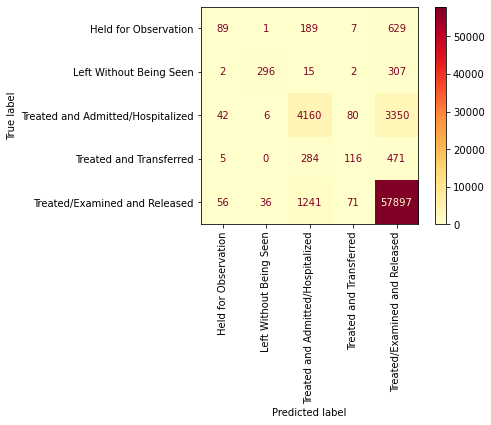

In [7]:
plot_confusion_matrix(classifier, X_test, y_test, xticks_rotation='vertical', cmap='YlOrRd')  
plt.show()

# Binary NEISS Dataset

In [8]:
df_binary_NEISS = df2
df_binary_NEISS = df_binary_NEISS.replace(['Treated and Admitted/Hospitalized',
                                     'Treated and Transferred'], 1)
df_binary_NEISS = df_binary_NEISS.replace(['Treated/Examined and Released',
                                     'Held for Observation',
                                         'Left Without Being Seen'], 0)
df_binary_NEISS = df_binary_NEISS.dropna()

In [9]:
sentences = df_binary_NEISS['Narrative'].values
y = df_binary_NEISS['Disposition'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<208053x34047 sparse matrix of type '<class 'numpy.int64'>'
	with 3732384 stored elements in Compressed Sparse Row format>

In [10]:
classifier = LogisticRegression(solver='lbfgs', max_iter=10000)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print("Accuracy:", score)

Accuracy: 0.9234052370515631


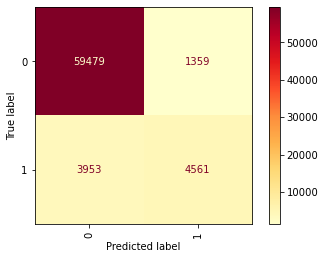

In [11]:
plot_confusion_matrix(classifier, X_test, y_test, xticks_rotation='vertical', cmap='YlOrRd')  
plt.show()

# CH Dataset

In [12]:
dfCH = pd.read_excel('CPSC Clearinghouse.xlsx')

In [13]:
df2 = dfCH[['VICTIM 1 SEVERITY','INCIDENT DESCRIPTION']]
df2 = df2.rename({'VICTIM 1 SEVERITY':'SEVERITY'}, axis=1)
df2 = df2.drop(df2[df2.SEVERITY == 'Level of care not known'].index)
df2 = df2.drop(df2[df2.SEVERITY == 'Incident  No Injury'].index)
df2 = df2.drop(df2[df2.SEVERITY == 'Death'].index)
df2 = df2.dropna()

In [14]:
sentences = df2['INCIDENT DESCRIPTION'].values
y = df2['SEVERITY'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<11304x24216 sparse matrix of type '<class 'numpy.int64'>'
	with 663535 stored elements in Compressed Sparse Row format>

In [15]:
classifier = LogisticRegression(solver='lbfgs', max_iter=10000)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print("Accuracy:", score)

Accuracy: 0.6114649681528662


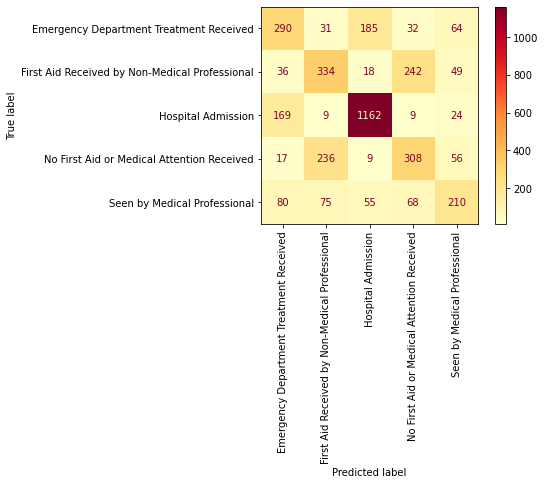

In [16]:
plot_confusion_matrix(classifier, X_test, y_test, xticks_rotation='vertical', cmap='YlOrRd')  
plt.show()

# CH Binary Dataset

In [17]:
df_binary_CH = df2
df_binary_CH = df_binary_CH.replace(['Emergency Department Treatment Received',
                                     'Seen by Medical Professional',
                                     'Hospital Admission'], 1)
df_binary_CH = df_binary_CH.replace(['First Aid Received by Non-Medical Professional',
                                     'No First Aid or Medical Attention Received'], 0)

In [18]:
sentences = df_binary_CH['INCIDENT DESCRIPTION'].values
y = df_binary_CH['SEVERITY'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<11304x24216 sparse matrix of type '<class 'numpy.int64'>'
	with 663535 stored elements in Compressed Sparse Row format>

In [19]:
classifier = LogisticRegression(solver='lbfgs', max_iter=10000)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print("Accuracy:", score)

Accuracy: 0.8946390658174098


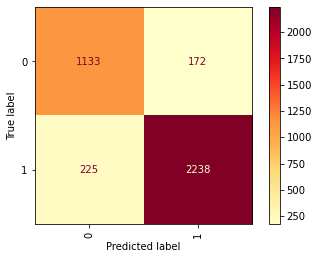

In [20]:
plot_confusion_matrix(classifier, X_test, y_test, xticks_rotation='vertical', cmap = 'YlOrRd')  
plt.show()